# Linear Regression with one variable


Task will be prediction of kangaroo nasal width having its length.

- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 0 - Download data

In [1]:
!pip install wget
import wget
wget.download('https://dru.fra1.digitaloceanspaces.com/DS_Fundamentals/datasets/04_supervised_learning/Linear_Regression_with_one_variable/kangaroo.csv')


100% [..................................................................................] 405 / 405

'kangaroo (2).csv'

## 1 - Packages ##

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 2 - Overview of the Problem set ##


In [3]:
# Loading the data

def load_data():
    from sklearn.model_selection import train_test_split

    data = np.genfromtxt('kangaroo.csv', delimiter=',')
    
    x = data[:, 0]
    y = data[:, 1]
    
    train_set_x, test_set_x, train_set_y, test_set_y = train_test_split(x, y, test_size=0.33, random_state=42)
        
    return train_set_x, test_set_x, train_set_y, test_set_y

train_set_x, test_set_x, train_set_y, test_set_y = load_data()

In [4]:
print (train_set_x.shape, test_set_x.shape, train_set_y.shape, test_set_y.shape)

(30,) (15,) (30,) (15,)


In [5]:
m_train = len(train_set_x)
m_test = len(test_set_x)

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 30
Number of testing examples: m_test = 15
train_set_x shape: (30,)
train_set_y shape: (30,)
test_set_x shape: (15,)
test_set_y shape: (15,)


### Data visualization

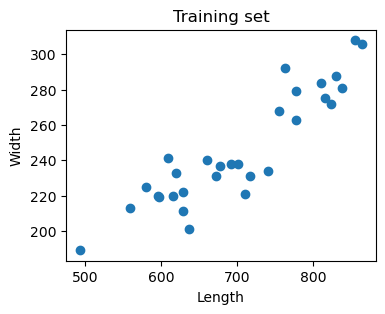

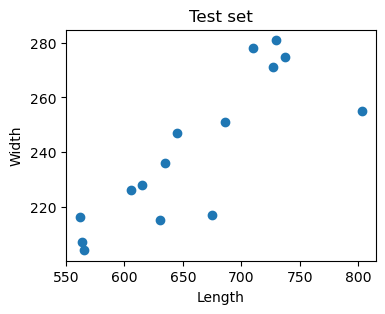

In [6]:
# Training set
plt.figure(figsize=(4, 3))
plt.scatter(train_set_x, train_set_y)
plt.title("Training set")
plt.xlabel("Length")
plt.ylabel("Width");

# Test set
plt.figure(figsize=(4, 3))
plt.scatter(test_set_x, test_set_y)
plt.title("Test set")
plt.xlabel("Length")
plt.ylabel("Width");

### Standardization
One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array.

$$X_{new}= \frac{X - \mu}{\sigma}$$

Let's standardize our dataset.

In [7]:
mean = np.concatenate([train_set_x,test_set_x]).mean()
std = np.concatenate([train_set_x,test_set_x]).std()

train_set_x = (train_set_x - mean) / std
test_set_x = (test_set_x - mean) / std

### Standardized data visualization

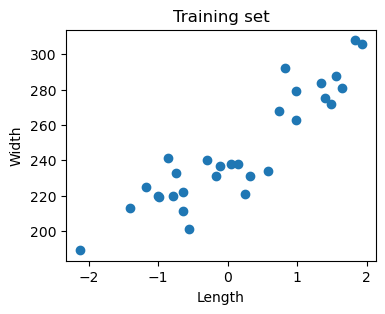

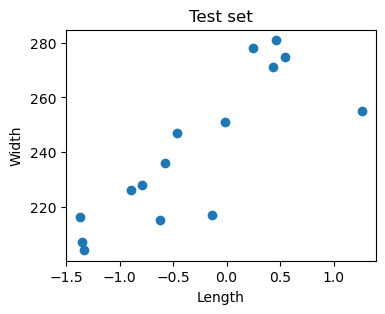

In [8]:
plt.figure(figsize=(4, 3))
plt.scatter(train_set_x, train_set_y)
plt.title("Training set")
plt.xlabel("Length")
plt.ylabel("Width");

plt.figure(figsize=(4, 3))
plt.scatter(test_set_x, test_set_y)
plt.title("Test set")
plt.xlabel("Length")
plt.ylabel("Width");

## 3 - General Architecture of the learning algorithm ##

**Mathematical expression of the algorithm**:


For one example $x^{(i)}$:

$$h^{(i)} = \theta x^{(i)} + b\tag{1}$$
The cost is then computed by summing over all training examples:
$$J(\theta, b) = \frac{1}{2m}\sum_{i=1}^{m}(h^{(i)}- y^{(i)})^{2}\tag{2}$$ 

**Key steps**:
In this exercise, you will carry out the following steps:

   - Initialize the parameters of the model
   - Learn the parameters for the model by minimizing the cost  
   - Use the learned parameters to make predictions (on the test set)
   - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 


### 4.1 - Initializing parameters

In [9]:
def initialize_with_zeros():
    """
    This function initializes parameters theta and b as 0.
    
    Returns:
    theta -- initialized scalar parameter
    b -- initialized scalar (corresponds to the bias)
    """
    
    theta = 0
    b = 0

    assert(isinstance(theta, int))
    assert(isinstance(b, int))
    
    return theta, b

In [10]:
theta, b = initialize_with_zeros()
print ("theta = " + str(theta))
print ("b = " + str(b))

theta = 0
b = 0


### 4.2 - Forward and Backward propagation

Here is the formula of gradient of the cost function: 

$$ \frac{\partial J}{\partial \theta} = \frac{1}{m}X(H-Y)^T\tag{3}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (h^{(i)}-y^{(i)})\tag{4}$$


In [11]:
def propagate(theta, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    theta -- parameter, a scalar
    b -- bias, a scalar
    X -- features vector of size (number of examples, )
    Y -- results vector (number of examples, )

    Return:
    cost -- cost function for linear regression
    dt -- gradient of the loss with respect to theta, thus same shape as theta
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation.
    - Use np.dot() to avoid for-loops in favor of code vectorization
    """
    
    m = X.shape[0]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    H = np.dot(X, theta) + b         # compute activation
    cost = (1/(2*m)) * np.sum((H - Y)**2)     # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dt = (1/m)*np.dot(X, (H-Y).T)
    db = (1/m)*np.sum(H-Y)
    ### END CODE HERE ###
    
    assert(dt.dtype == float)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dt": dt,
             "db": db}
    
    return grads, cost

In [12]:
theta, b, X, Y = 1., 2., np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]), np.array([2, 3, 4, 5, 6, 7])
grads, cost = propagate(theta, b, X, Y)
print ("dt = " + str(grads["dt"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dt = -1.015
db = -2.15
cost = 3.4925


### 4.3 - Optimization

In [13]:
def optimize(theta, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes theta and b by running a gradient descent algorithm
    
    Arguments:
    theta -- parameter, a scalar
    b -- bias, a scalar
    X -- features vector of shape (number of examples, )
    Y -- results vector of shape (number of examples, )
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights theta and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for theta and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1 line of code)
        grads, cost = propagate(theta, b, X, Y)

        # Retrieve derivatives from grads
        dt = grads["dt"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        theta -= learning_rate * dt
        b -= learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"theta": theta,
              "b": b}
    
    grads = {"dt": dt,
             "db": db}
    
    return params, grads, costs

In [14]:
params, grads, costs = optimize(theta, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)
print ("theta = " + str(params["theta"]))
print ("b = " + str(params["b"]))
print ("dt = " + str(grads["dt"]))
print ("db = " + str(grads["db"]))

theta = 1.6451645666550938
b = 3.1951480476314393
dt = -0.5018556276988992
db = -0.7372605441640054


In [15]:
def predict(theta, b, X):
    """
    Predict using learned linear regression parameters (theta, b)
    
    Arguments:
    theta -- parameter, a scalar
    b -- bias, a scalar
    X -- features vector of size (number of examples, )
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions for the examples in X
    """
    
    # Compute vector "Y_prediction" predicting the width of a kangoroo nasal
    ### START CODE HERE ### (≈ 1 line of code)
    Y_prediction = theta*X + b
    ### END CODE HERE ###
    
    return Y_prediction

In [16]:
theta = 0.1124579
b = -0.3
X = np.array([1., -1.1, -3.2, 1.2, 2., 0.1])
print ("predictions = " + str(predict(theta, b, X)))

predictions = [-0.1875421  -0.42370369 -0.65986528 -0.16505052 -0.0750842  -0.28875421]


## 5 - Merge all functions into a model ##


In [17]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the linear regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (m_train, )
    Y_train -- training values represented by a numpy array (vector) of shape (m_train, )
    X_test -- test set represented by a numpy array of shape (m_test, )
    Y_test -- test values represented by a numpy array (vector) of shape (m_test, )
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
        
    # initialize parameters with zeros (≈ 1 line of code)
    theta, b = initialize_with_zeros()

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(theta, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    theta = parameters["theta"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(theta, b, X_test)
    Y_prediction_train = predict(theta, b, X_train)

     # Print train/test Errors
    print ("Train RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_train - Y_train) ** 2))))
    print ("Test RMSE: {} ".format(np.sqrt(np.mean((Y_prediction_test - Y_test) ** 2))))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "theta" : theta, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [18]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=500, learning_rate=0.05, print_cost=True)

Cost after iteration 0: 30753.266667
Cost after iteration 100: 89.390351
Cost after iteration 200: 87.787635
Cost after iteration 300: 87.787489
Cost after iteration 400: 87.787489
Train RMSE: 13.250470884220235 
Test RMSE: 16.20421532059726 


### Check the result

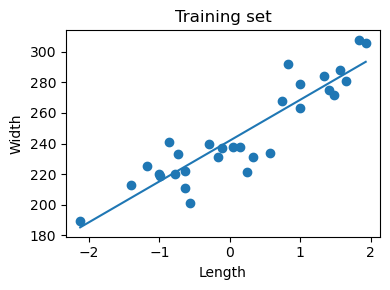

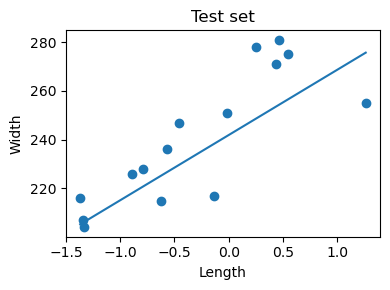

In [19]:
# Training set
plt.figure(figsize=(4, 3))
plt.title("Training set")

plt.scatter(train_set_x, train_set_y)
x = np.array([min(train_set_x), max(train_set_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()


# Test set
plt.figure(figsize=(4, 3))
plt.title("Test set")

plt.scatter(test_set_x, test_set_y)
x = np.array([min(test_set_x), max(test_set_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b 
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()